# 数据集:Movies Dataset from Pirated Sites

## 数据预处理

### 1.读入数据并导入需要的包

In [32]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import copy
from tqdm import tqdm

data_path="./movies_dataset.csv"
datas = []
with open(data_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        datas.append(row)
# 查看数据格式
print(datas[0])
print(len(datas))

{'': '0', 'IMDb-rating': '4.8', 'appropriate_for': 'R', 'director': 'John Swab', 'downloads': '304', 'id': '372092', 'industry': 'Hollywood / English', 'language': 'English', 'posted_date': '20 Feb, 2023', 'release_date': 'Jan 28 2023', 'run_time': '105', 'storyline': 'Doc\n facilitates a fragile truce between the Governor and Cartel, trading \nprosecutorial leniency for finance. With no more truce, Doc is left to \nfend for himself and protect the one untainted thing in his life: his \ndaughter, Little Dixie.', 'title': 'Little Dixie', 'views': '2,794', 'writer': 'John Swab'}
20548


### 2.分析数据属性类型，形成字典

In [33]:
type_dict = {'': 'numeric', 'IMDb-rating': 'numeric', 'appropriate_for': 'nominal', 'director': 'nominal', 'downloads': 'numeric', 'id': 'nominal', 'industry': 'nominal', 'language': 'nominal', 'posted_date': 'numeric', 'release_date': 'numeric', 'run_time': 'numeric', 'storyline': 'nominal', 'title': 'nominal', 'views': 'numeric', 'writer': 'nominal'}

## 数据分析

### 1.对标称属性，绘制柱状图以查看各属性取值频数

attribute name: appropriate_for
number of missing value: 9476
11


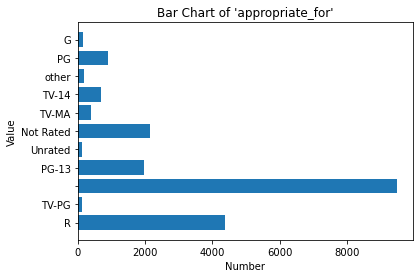

attribute name: director
number of missing value: 1938
14


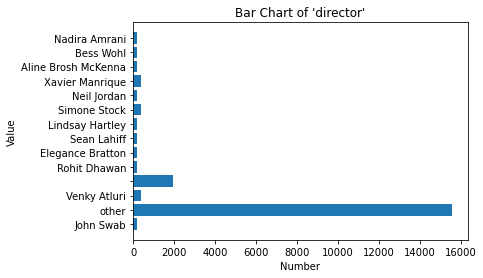

14


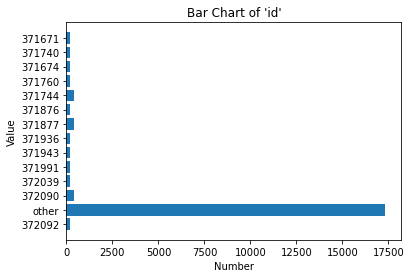

attribute name: industry
number of missing value: 1
8


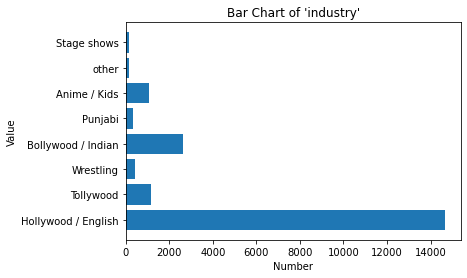

attribute name: language
number of missing value: 542
11


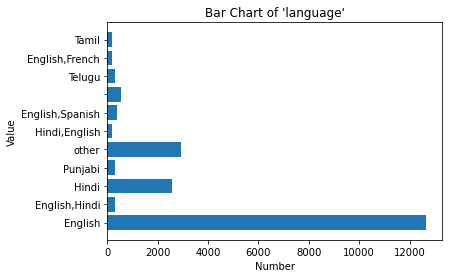

attribute name: storyline
number of missing value: 1701
14


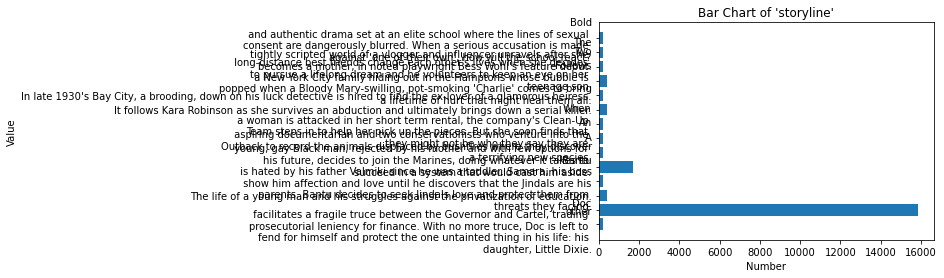

attribute name: title
number of missing value: 1
14


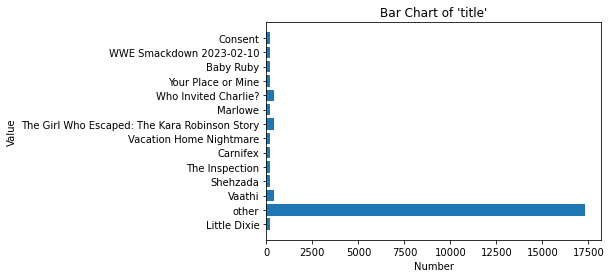

attribute name: writer
number of missing value: 2192
14


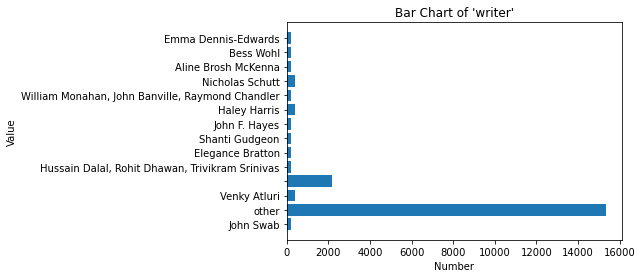

In [34]:
for key in type_dict.keys():
    if type_dict[key]=='nominal':
        value = {}
        for data in datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        if '' in value.keys():
            print(f"attribute name: {key}\nnumber of missing value: {(value[''])}")
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        print(len(abstract.keys()))
        # 数据
        x = list(abstract.keys()) # x轴标签
        y = list(abstract.values())    # y轴值
        
        # 创建柱状图
        plt.barh(x, y)
        
        # 添加标题和标签
        plt.title(f"Bar Chart of '{key}'")
        plt.xlabel('Number')
        plt.ylabel('Value')
        
        # 显示图形
        plt.show()

### 2.对数值属性，绘制箱线图与直方图，并给出五数概括与缺失值个数

attribute name: IMDb-rating
number of missing value: 841
five-number summary: Minimum: 1.1, Maximum: 9.9, Q1: 4.8, Median: 5.7, Q3: 6.6


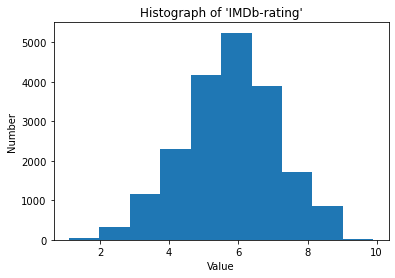

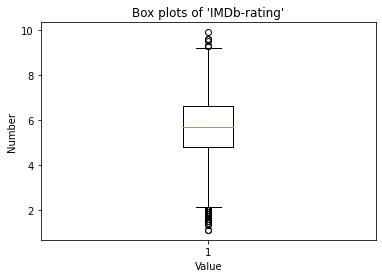

attribute name: downloads
number of missing value: 1
five-number summary: Minimum: 0, Maximum: 391272, Q1: 855.5, Median: 2716.0, Q3: 10070.0


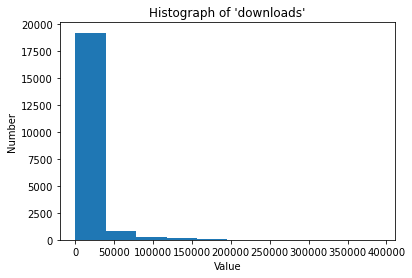

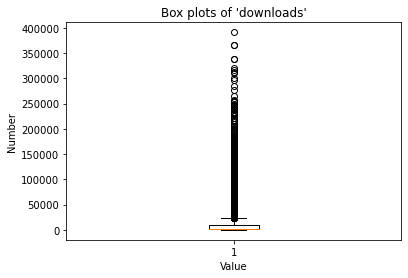

attribute name: posted_date
number of missing value: 1
five-number summary: Minimum: 19700101, Maximum: 20230220, Q1: 20140606.0, Median: 20180525.0, Q3: 20220115.0


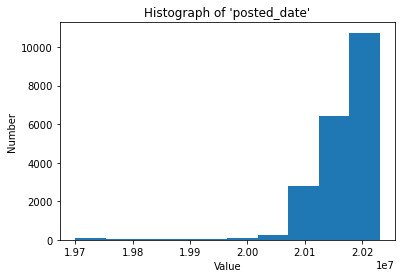

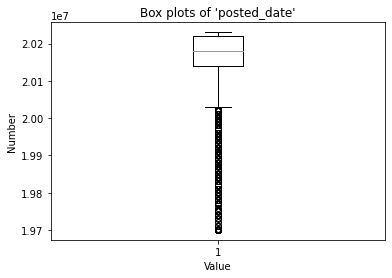

attribute name: release_date
number of missing value: 1
five-number summary: Minimum: 19210205, Maximum: 20230923, Q1: 20130118.0, Median: 20170929.0, Q3: 20211105.0


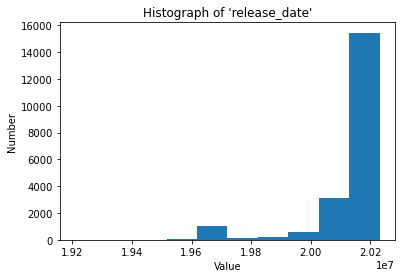

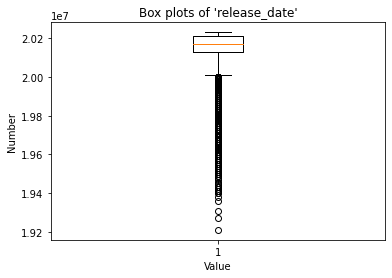

attribute name: run_time
number of missing value: 1768
five-number summary: Minimum: 1, Maximum: 321, Q1: 90.0, Median: 99.0, Q3: 117.0


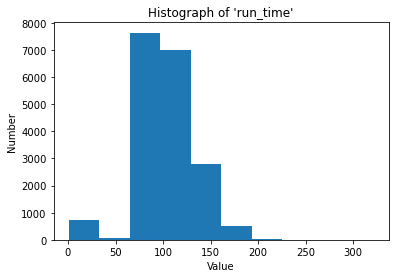

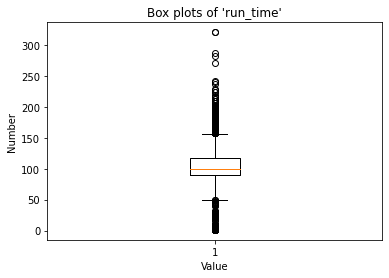

attribute name: views
number of missing value: 1
five-number summary: Minimum: 20230213, Maximum: 20230213, Q1: 20230213.0, Median: 20230213.0, Q3: 20230213.0


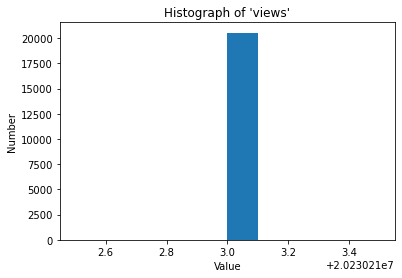

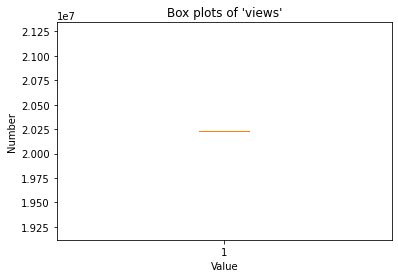

In [35]:
for key in type_dict.keys():
    if key =='':
        continue
    value = []
    if type_dict[key]=='numeric':
        for data in datas:
            # 对各个属性分别处理
            if key == 'IMDb-rating':
                if data[key]=='': 
                    value.append('')
                else:
                    value.append(float(data[key]))
            elif key == 'downloads':
                if data[key]=='': 
                    value.append('')
                else:
                    tmp = data[key].replace(',','')
                    value.append(int(tmp))
            elif key == 'run_time':
                if data[key]=='': 
                    value.append('')
                elif 'h' in data[key] and 'min' in data[key]:
                    tmp = data[key].replace('h','')
                    tmp = tmp.replace('min','')
                    tmp = tmp.split()
                    value.append(int(tmp[0])*60 + int(tmp[1]))
                elif 'h' in data[key]:
                    tmp = data[key].replace('h','')
                    value.append(int(tmp[0])*60)
                elif 'min' in data[key]:
                    tmp = data[key].replace('min','')
                    value.append(int(tmp[0]))
                else:
                    tmp = data[key].replace(',','')
                    value.append(int(tmp))
            elif key == 'posted_date':
                if data[key]=='': 
                    value.append('')
                else:
                    date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                    tmp = data[key].replace(',','')
                    tmp = tmp.split()
                    data_str = tmp[2] + date_dict[tmp[1]] + tmp[0]
                    date = int(data_str)
                    value.append(date)
            elif key == 'release_date':
                if data[key]=='': 
                    value.append('')
                else:
                    date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                    tmp = data[key].split()
                    data_str = tmp[2] + date_dict[tmp[0]] + tmp[1]
                    date = int(data_str)
                    value.append(date)
            elif key == 'views':
                if data[key]=='': 
                    value.append('')
                else:
                    tmp = data[key].replace(',','')
                    date = int(data_str)
                    value.append(date)
        # print(len(value))
        print(f"attribute name: {key}\nnumber of missing value: {value.count('')}")
        
        value = [element for element in value if element != '']
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")

        plt.hist(value)
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.title(f"Histograph of '{key}'")
        plt.show()

        plt.boxplot(value)
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.title(f"Box plots of '{key}'")
        plt.show()



## 缺失值处理

### 方法一：将缺失部分剔除

#### 1.剔除含缺失值的数据

In [36]:
print(f"原数据集数据数量: {len(datas)}")
tmp_datas = copy.deepcopy(datas)
for key in type_dict.keys():
    processed_datas = []
    for data in tmp_datas:
        if data[key] == "":
            continue
        processed_datas.append(data)
    tmp_datas = processed_datas
print(f"处理后数据集数据数量: {len(processed_datas)}")

原数据集数据数量: 20548
处理后数据集数据数量: 9902


#### 2.将数值型数据处理为float类型便于统计

In [37]:
for key in type_dict.keys(): 
    for data in tqdm(tmp_datas):
        if 'list' not in data.keys():
            data['list']=[]
        if type_dict[key]=='numeric' and key!='':
            # 对各个属性分别处理
            if key == 'IMDb-rating':
                data[key] = float(data[key])
            elif key == 'downloads':
                tmp = data[key].replace(',','')
                data[key] = int(tmp)
            elif key == 'run_time':
                if 'h' in data[key] and 'min' in data[key]:
                    tmp = data[key].replace('h','')
                    tmp = tmp.replace('min','')
                    tmp = tmp.split()
                    data[key] = (int(tmp[0])*60 + int(tmp[1]))
                elif 'h' in data[key]:
                    tmp = data[key].replace('h','')
                    data[key] = (int(tmp[0])*60)
                elif 'min' in data[key]:
                    tmp = data[key].replace('min','')
                    data[key] = (int(tmp[0]))
                else:
                    tmp = data[key].replace(',','')
                    data[key] = (int(tmp))
            elif key == 'posted_date':
                date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                tmp = data[key].replace(',','')
                tmp = tmp.split()
                data_str = tmp[2] + date_dict[tmp[1]] + tmp[0]
                date = int(data_str)
                data[key] = date
            elif key == 'release_date':
                date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                tmp = data[key].split()
                data_str = tmp[2] + date_dict[tmp[0]] + tmp[1]
                date = int(data_str)
                data[key] = date
            elif key == 'views':
                tmp = data[key].replace(',','')
                date = int(data_str)
                data[key] = date

100%|██████████| 9902/9902 [00:00<00:00, 736474.35it/s]


100%|██████████| 9902/9902 [00:00<00:00, 1502115.74it/s]


#### 3.查看数据集数据分布，并与原数据集对比

In [38]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        # print(value)
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')



Attribute: IMDb-rating
five-number summary: Minimum: 1.1, Maximum: 9.3, Q1: 5.2, Median: 6.0, Q3: 6.675

Attribute: appropriate_for
取值'R'的频数为3873
取值'other'的频数为243
取值'PG-13'的频数为1787
取值'Unrated'的频数为122
取值'Not Rated'的频数为1938
取值'TV-MA'的频数为384
取值'TV-14'的频数为664
取值'PG'的频数为771
取值'G'的频数为120

Attribute: director
取值'John Swab'的频数为203
取值'other'的频数为8689
取值'Elegance Bratton'的频数为202
取值'Simone Stock'的频数为402
取值'Neil Jordan'的频数为205
取值'Aline Brosh McKenna'的频数为201

Attribute: downloads
five-number summary: Minimum: 0.0, Maximum: 391272.0, Q1: 1340.25, Median: 4473.0, Q3: 16538.5

Attribute: id
取值'372092'的频数为202
取值'other'的频数为8694
取值'371991'的频数为202
取值'371877'的频数为402
取值'371876'的频数为201
取值'371760'的频数为201

Attribute: industry
取值'Hollywood / English'的频数为7880
取值'Bollywood / Indian'的频数为983
取值'Tollywood'的频数为320
取值'Anime / Kids'的频数为634
取值'other'的频数为85

Attribute: language
取值'English'的频数为6110
取值'English,Hindi'的频数为270
取值'Hindi'的频数为724
取值'other'的频数为2010
取值'English,Spanish'的频数为312
取值'English,French'的频数为133
取值'Tamil'的频数

### 方法二：用最高频率值来填补缺失值

#### 1.使用最高频率值来补全缺失值

In [39]:
print(f"原数据集数据数量: {len(datas)}")
processed_datas = copy.deepcopy(datas)
for key in type_dict.keys():
    value = {}
    for data in processed_datas:
        if data[key] not in value.keys():
            value[data[key]] = 1
        else:
            value[data[key]] += 1
    # 统计出现次数最多的值
    tmp = sorted(value.items(), key = lambda x:x[1])[-1]
    # 如果出现最多的是缺失值，则选用第二多的值
    if tmp[0] == '':
        tmp = sorted(value.items(), key = lambda x:x[1])[-2]
    for data in processed_datas:
        if data[key] =='':
            data[key] = tmp[0]
print(f"处理后数据集数据数量: {len(processed_datas)}")

原数据集数据数量: 20548
处理后数据集数据数量: 20548


#### 2.将数值型数据处理为float类型便于统计

In [40]:
for key in type_dict.keys(): 
    for data in tqdm(processed_datas):
        if 'list' not in data.keys():
            data['list']=[]
        if type_dict[key]=='numeric' and key!='':
            # 对各个属性分别处理
            if key == 'IMDb-rating':
                data[key] = float(data[key])
            elif key == 'downloads':
                tmp = data[key].replace(',','')
                data[key] = int(tmp)
            elif key == 'run_time':
                if 'h' in data[key] and 'min' in data[key]:
                    tmp = data[key].replace('h','')
                    tmp = tmp.replace('min','')
                    tmp = tmp.split()
                    data[key] = (int(tmp[0])*60 + int(tmp[1]))
                elif 'h' in data[key]:
                    tmp = data[key].replace('h','')
                    data[key] = (int(tmp[0])*60)
                elif 'min' in data[key]:
                    tmp = data[key].replace('min','')
                    data[key] = (int(tmp[0]))
                else:
                    tmp = data[key].replace(',','')
                    data[key] = (int(tmp))
            elif key == 'posted_date':
                date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                tmp = data[key].replace(',','')
                tmp = tmp.split()
                data_str = tmp[2] + date_dict[tmp[1]] + tmp[0]
                date = int(data_str)
                data[key] = date
            elif key == 'release_date':
                date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                tmp = data[key].split()
                data_str = tmp[2] + date_dict[tmp[0]] + tmp[1]
                date = int(data_str)
                data[key] = date
            elif key == 'views':
                tmp = data[key].replace(',','')
                date = int(data_str)
                data[key] = date

100%|██████████| 20548/20548 [00:00<00:00, 1197922.84it/s]


#### 3.查看数据集数据分布，并与原数据集对比

In [41]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')


Attribute: IMDb-rating
five-number summary: Minimum: 1.1, Maximum: 9.9, Q1: 4.9, Median: 5.8, Q3: 6.6

Attribute: appropriate_for
取值'R'的频数为13860
取值'TV-PG'的频数为115
取值'PG-13'的频数为1968
取值'Unrated'的频数为132
取值'Not Rated'的频数为2142
取值'TV-MA'的频数为406
取值'TV-14'的频数为694
取值'other'的频数为193
取值'PG'的频数为886
取值'G'的频数为152

Attribute: director
取值'John Swab'的频数为205
取值'other'的频数为15576
取值'Venky Atluri'的频数为2343
取值'Rohit Dhawan'的频数为203
取值'Elegance Bratton'的频数为202
取值'Sean Lahiff'的频数为201
取值'Lindsay Hartley'的频数为203
取值'Simone Stock'的频数为403
取值'Neil Jordan'的频数为205
取值'Xavier Manrique'的频数为403
取值'Aline Brosh McKenna'的频数为201
取值'Bess Wohl'的频数为201
取值'Nadira Amrani'的频数为202

Attribute: downloads
five-number summary: Minimum: 0.0, Maximum: 391272.0, Q1: 854.75, Median: 2716.0, Q3: 10069.5

Attribute: id
取值'372092'的频数为202
取值'other'的频数为17327
取值'372090'的频数为402
取值'372039'的频数为201
取值'371991'的频数为202
取值'371943'的频数为201
取值'371936'的频数为202
取值'371877'的频数为402
取值'371876'的频数为201
取值'371744'的频数为402
取值'371760'的频数为201
取值'371674'的频数为201
取值'371740'的频数

### 方法三：通过数据对象之间的相似性来填补缺失值

#### 1.使用LabelEncoder对标称属性进行编号

In [42]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

encoder_list = {}
max_label_list = {}
for key in type_dict.keys():
    if type_dict[key]=='nominal':
        value = []
        for data in datas:
            value.append(data[key])
        encoder = LabelEncoder()
        encoder.fit(np.array(value).reshape(-1, 1))
        encoder_list[key]=encoder
        max_label_list[key] = max(encoder.transform(np.array(value).reshape(-1, 1)))

print(len(encoder_list)) 
print(max_label_list)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8
{'appropriate_for': 21, 'director': 9672, 'id': 17085, 'industry': 10, 'language': 1168, 'storyline': 15748, 'title': 16572, 'writer': 13603}


#### 2.使用KNN选出相似数据，并利用相似数据进行缺失值填充

In [43]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

tmp_datas = copy.deepcopy(datas)
print(f"原数据集数据数量: {len(datas)}")

for key in type_dict.keys(): 
    for data in tqdm(tmp_datas):
        if 'list' not in data.keys():
            data['list']=[]
        if data[key]=='':
            data['list'].append(np.nan)
        elif type_dict[key]=='numeric' and key!='':
            # 对各个属性分别处理
            if key == 'IMDb-rating':
                data[key] = float(data[key])
            elif key == 'downloads':
                tmp = data[key].replace(',','')
                data[key] = int(tmp)
            elif key == 'run_time':
                if 'h' in data[key] and 'min' in data[key]:
                    tmp = data[key].replace('h','')
                    tmp = tmp.replace('min','')
                    tmp = tmp.split()
                    data[key] = (int(tmp[0])*60 + int(tmp[1]))
                elif 'h' in data[key]:
                    tmp = data[key].replace('h','')
                    data[key] = (int(tmp[0])*60)
                elif 'min' in data[key]:
                    tmp = data[key].replace('min','')
                    data[key] = (int(tmp[0]))
                else:
                    tmp = data[key].replace(',','')
                    data[key] = (int(tmp))
            elif key == 'posted_date':
                date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                tmp = data[key].replace(',','')
                tmp = tmp.split()
                data_str = tmp[2] + date_dict[tmp[1]] + tmp[0]
                date = int(data_str)
                data[key] = date
            elif key == 'release_date':
                date_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                tmp = data[key].split()
                data_str = tmp[2] + date_dict[tmp[0]] + tmp[1]
                date = int(data_str)
                data[key] = date
            elif key == 'views':
                tmp = data[key].replace(',','')
                date = int(data_str)
                data[key] = date
            data['list'].append(data[key])
        elif type_dict[key]=='nominal':
            data_encoded = (encoder_list[key]).transform([data[key]])
            data['list'].append(data_encoded[0])
# 转成list格式的，属性为float类型的数据用于计算相似度
list_datas = []
for data in tmp_datas:
    list_data = data['list']
    list_datas.append(list_data)
list_datas = np.array(list_datas)

原数据集数据数量: 20548


100%|██████████| 20548/20548 [01:15<00:00, 272.27it/s]


In [53]:
# 按相似度选出相似数据并填充
imputer = KNNImputer(n_neighbors=2)
print(list_datas[3])
filled_data = imputer.fit_transform(list_datas)
print(f"处理后数据集数据数量: {len(filled_data)}")
processed_data=[]
for data in filled_data:
    data_dict={}
    index=0
    for key in type_dict.keys():
        if key=='':
            continue
        if type_dict[key]=='nominal':
            encoder = encoder_list[key]
            tmp = int(data[index]) if data[index] < max_label_list[key] else max_label_list[key]
            data_ori = encoder.inverse_transform([tmp])[0]
            data_dict[key] = data_ori
            index+=1
        elif type_dict[key] =='numeric':
            data_dict[key] = data[index]
            index+=1
    processed_data.append(data_dict)

[8.1000000e+00           nan 9.3230000e+03 1.5490000e+03 1.4077000e+04
 9.0000000e+00 8.5500000e+02 2.0230220e+07 2.0230217e+07 1.3900000e+02
 1.2956000e+04 1.5654000e+04 2.0230213e+07 1.3093000e+04]
处理后数据集数据数量: 20548


#### 3.查看数据集数据分布，并与原数据集对比

In [54]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')



Attribute: IMDb-rating
five-number summary: Minimum: 1.1, Maximum: 9.9, Q1: 4.9, Median: 5.8, Q3: 6.6

Attribute: appropriate_for
取值'R'的频数为13860
取值'TV-PG'的频数为115
取值'PG-13'的频数为1968
取值'Unrated'的频数为132
取值'Not Rated'的频数为2142
取值'TV-MA'的频数为406
取值'TV-14'的频数为694
取值'other'的频数为193
取值'PG'的频数为886
取值'G'的频数为152

Attribute: director
取值'John Swab'的频数为205
取值'other'的频数为15576
取值'Venky Atluri'的频数为2343
取值'Rohit Dhawan'的频数为203
取值'Elegance Bratton'的频数为202
取值'Sean Lahiff'的频数为201
取值'Lindsay Hartley'的频数为203
取值'Simone Stock'的频数为403
取值'Neil Jordan'的频数为205
取值'Xavier Manrique'的频数为403
取值'Aline Brosh McKenna'的频数为201
取值'Bess Wohl'的频数为201
取值'Nadira Amrani'的频数为202

Attribute: downloads
five-number summary: Minimum: 0.0, Maximum: 391272.0, Q1: 854.75, Median: 2716.0, Q3: 10069.5

Attribute: id
取值'372092'的频数为202
取值'other'的频数为17327
取值'372090'的频数为402
取值'372039'的频数为201
取值'371991'的频数为202
取值'371943'的频数为201
取值'371936'的频数为202
取值'371877'的频数为402
取值'371876'的频数为201
取值'371744'的频数为402
取值'371760'的频数为201
取值'371674'的频数为201
取值'371740'的频数

### 方法四：通过属性的相关关系来填补缺失值

#### 1.利用其他属性计算得出缺失属性

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
tmp_datas = copy.deepcopy(list_datas)
imputer = IterativeImputer(random_state=0)
imputer.fit(tmp_datas)
filled_data = imputer.transform(tmp_datas)
print(f"原数据集数据数量: {len(datas)}")
print(f"处理后数据集数据数量: {len(filled_data)}")


原数据集数据数量: 20548
处理后数据集数据数量: 20548


#### 2.标称属性标签恢复

In [59]:
processed_data = []
for data in filled_data:
    data_dict={}
    index = 0
    for key in type_dict.keys():
        if key=='':
            continue
        if type_dict[key]=='nominal':
            encoder = encoder_list[key]
            tmp = int(data[index]) if data[index] < max_label_list[key] else max_label_list[key]
            tmp = tmp if tmp >=0 else 0
            data_ori = encoder.inverse_transform([tmp])[0]
            data_dict[key] = data_ori
        elif type_dict[key] =='numeric':
            data_dict[key] = data[index]
        index+=1
    processed_data.append(data_dict)

#### 3.查看数据集数据分布，并与原数据集对比

In [60]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        # print(value)
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')


Attribute: IMDb-rating
five-number summary: Minimum: 1.1, Maximum: 9.9, Q1: 4.9, Median: 5.8, Q3: 6.6

Attribute: appropriate_for
取值'R'的频数为13860
取值'TV-PG'的频数为115
取值'PG-13'的频数为1968
取值'Unrated'的频数为132
取值'Not Rated'的频数为2142
取值'TV-MA'的频数为406
取值'TV-14'的频数为694
取值'other'的频数为193
取值'PG'的频数为886
取值'G'的频数为152

Attribute: director
取值'John Swab'的频数为205
取值'other'的频数为15576
取值'Venky Atluri'的频数为2343
取值'Rohit Dhawan'的频数为203
取值'Elegance Bratton'的频数为202
取值'Sean Lahiff'的频数为201
取值'Lindsay Hartley'的频数为203
取值'Simone Stock'的频数为403
取值'Neil Jordan'的频数为205
取值'Xavier Manrique'的频数为403
取值'Aline Brosh McKenna'的频数为201
取值'Bess Wohl'的频数为201
取值'Nadira Amrani'的频数为202

Attribute: downloads
five-number summary: Minimum: 0.0, Maximum: 391272.0, Q1: 854.75, Median: 2716.0, Q3: 10069.5

Attribute: id
取值'372092'的频数为202
取值'other'的频数为17327
取值'372090'的频数为402
取值'372039'的频数为201
取值'371991'的频数为202
取值'371943'的频数为201
取值'371936'的频数为202
取值'371877'的频数为402
取值'371876'的频数为201
取值'371744'的频数为402
取值'371760'的频数为201
取值'371674'的频数为201
取值'371740'的频数

# 数据集:GitHub Dataset

## 数据预处理

### 1.读入数据并导入需要的包

In [61]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import copy
from tqdm import tqdm

data_path="./github_dataset.csv"
datas = []
with open(data_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        datas.append(row)
# 查看数据格式
print(datas[0])
print(len(datas))

{'repositories': 'octocat/Hello-World', 'stars_count': '0', 'forks_count': '0', 'issues_count': '612', 'pull_requests': '316', 'contributors': '2', 'language': 'NULL'}
1052


### 2.分析数据属性类型，形成字典

In [62]:
type_dict = {'repositories': 'nominal', 'stars_count': 'numeric', 'forks_count': 'numeric', 'issues_count': 'numeric', 'pull_requests': 'numeric', 'contributors': 'numeric', 'language': 'nominal'}

## 数据分析

### 1.对标称属性，绘制柱状图以查看各属性取值频数

1


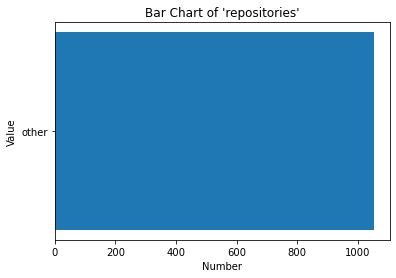

16


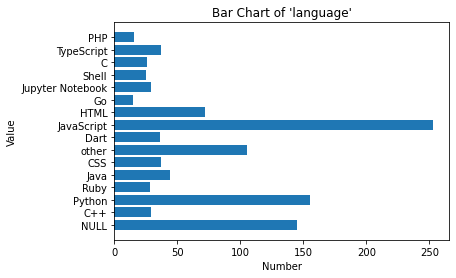

In [63]:
for key in type_dict.keys():
    if type_dict[key]=='nominal':
        value = {}
        for data in datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        if '' in value.keys():
            print(f"attribute name: {key}\nnumber of missing value: {(value[''])}")
        abstract = {}
        for v in value.keys():
            if value[v] > 10:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        print(len(abstract.keys()))
        # 数据
        x = list(abstract.keys()) # x轴标签
        y = list(abstract.values())    # y轴值
        
        # 创建柱状图
        plt.barh(x, y)
        
        # 添加标题和标签
        plt.title(f"Bar Chart of '{key}'")
        plt.xlabel('Number')
        plt.ylabel('Value')
        
        # 显示图形
        plt.show()

### 2.对数值属性，绘制箱线图与直方图，并给出五数概括与缺失值个数

attribute name: stars_count
number of missing value: 0
five-number summary: Minimum: 0.0, Maximum: 995.0, Q1: 1.0, Median: 12.0, Q3: 65.25


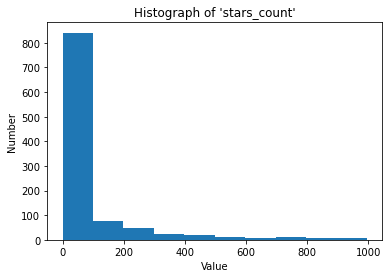

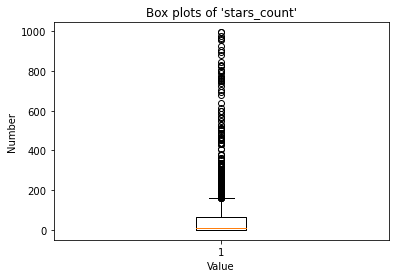

attribute name: forks_count
number of missing value: 0
five-number summary: Minimum: 0.0, Maximum: 973.0, Q1: 1.0, Median: 6.0, Q3: 38.25


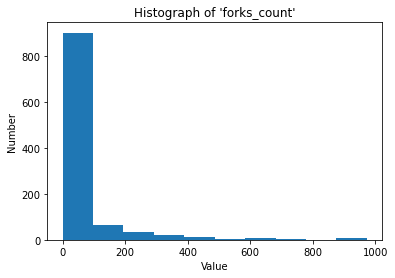

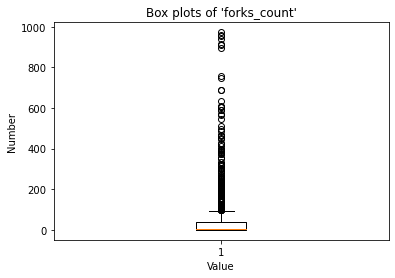

attribute name: issues_count
number of missing value: 0
five-number summary: Minimum: 1.0, Maximum: 612.0, Q1: 1.0, Median: 2.0, Q3: 6.0


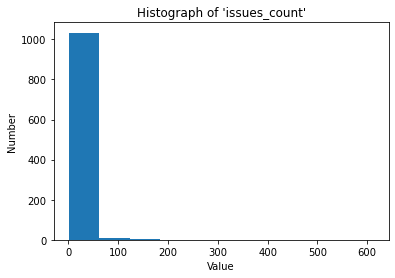

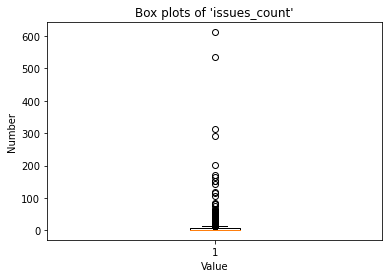

attribute name: pull_requests
number of missing value: 0
five-number summary: Minimum: 0.0, Maximum: 567.0, Q1: 0.0, Median: 0.0, Q3: 2.0


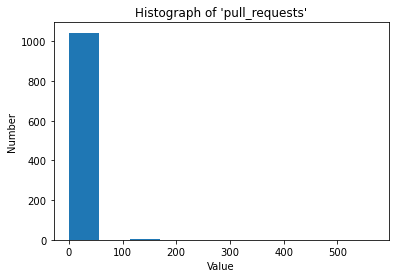

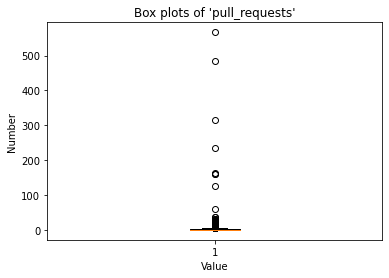

attribute name: contributors
number of missing value: 0
five-number summary: Minimum: 0.0, Maximum: 658.0, Q1: 0.0, Median: 2.0, Q3: 4.0


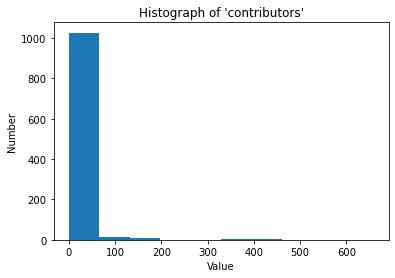

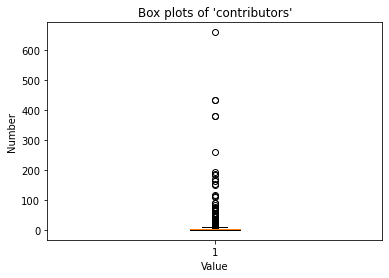

In [64]:
for key in type_dict.keys():
    if key =='':
        continue
    value = []
    if type_dict[key]=='numeric':
        for data in datas:
            value.append(float(data[key]))
        print(f"attribute name: {key}\nnumber of missing value: {value.count('')}")
        
        value = [element for element in value if element != '']
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")

        plt.hist(value)
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.title(f"Histograph of '{key}'")
        plt.show()

        plt.boxplot(value)
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.title(f"Box plots of '{key}'")
        plt.show()



## 缺失值处理

### 方法一：将缺失部分剔除

#### 1.剔除含缺失值的数据

In [65]:
print(f"原数据集数据数量: {len(datas)}")
tmp_datas = copy.deepcopy(datas)
for key in type_dict.keys():
    processed_datas = []
    for data in tmp_datas:
        if data[key] == 'NULL':
            continue
        processed_datas.append(data)
    tmp_datas = processed_datas
print(f"处理后数据集数据数量: {len(processed_datas)}")

原数据集数据数量: 1052
处理后数据集数据数量: 907


#### 2.将数值型数据处理为float类型便于统计

In [66]:
for key in type_dict.keys(): 
    for data in tqdm(tmp_datas):
        if 'list' not in data.keys():
            data['list']=[]
        if type_dict[key]=='numeric' and key!='':
            data[key] = float(data[key])

100%|██████████| 907/907 [00:00<00:00, 1821951.02it/s]


#### 3.查看数据集数据分布，并与原数据集对比

In [67]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        # print(value)
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 10:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')


Attribute: repositories
取值'other'的频数为907

Attribute: stars_count
five-number summary: Minimum: 0.0, Maximum: 977.0, Q1: 1.0, Median: 11.0, Q3: 60.0

Attribute: forks_count
five-number summary: Minimum: 0.0, Maximum: 973.0, Q1: 1.0, Median: 6.0, Q3: 35.0

Attribute: issues_count
five-number summary: Minimum: 1.0, Maximum: 313.0, Q1: 1.0, Median: 2.0, Q3: 6.0

Attribute: pull_requests
five-number summary: Minimum: 0.0, Maximum: 164.0, Q1: 0.0, Median: 0.0, Q3: 2.0

Attribute: contributors
five-number summary: Minimum: 0.0, Maximum: 658.0, Q1: 0.0, Median: 2.0, Q3: 5.0

Attribute: language
取值'C++'的频数为29
取值'Python'的频数为155
取值'Ruby'的频数为28
取值'Java'的频数为44
取值'CSS'的频数为37
取值'other'的频数为105
取值'Dart'的频数为36
取值'JavaScript'的频数为253
取值'HTML'的频数为72
取值'Go'的频数为15
取值'Jupyter Notebook'的频数为29
取值'Shell'的频数为25
取值'C'的频数为26
取值'TypeScript'的频数为37
取值'PHP'的频数为16



### 方法二：用最高频率值来填补缺失值

#### 1.使用最高频率值来补全缺失值

In [68]:
print(f"原数据集数据数量: {len(datas)}")
processed_datas = copy.deepcopy(datas)
for key in type_dict.keys():
    value = {}
    for data in processed_datas:
        if data[key] not in value.keys():
            value[data[key]] = 1
        else:
            value[data[key]] += 1
    # 统计出现次数最多的值
    tmp = sorted(value.items(), key = lambda x:x[1])[-1]
    # 如果出现最多的是缺失值，则选用第二多的值
    if tmp[0] == 'NULL':
        tmp = sorted(value.items(), key = lambda x:x[1])[-2]
    for data in processed_datas:
        if data[key] =='NULL':
            data[key] = tmp[0]
print(f"处理后数据集数据数量: {len(processed_datas)}")

原数据集数据数量: 1052
处理后数据集数据数量: 1052


#### 2.将数值型数据处理为float类型便于统计

In [69]:
for key in type_dict.keys(): 
    for data in tqdm(processed_datas):
        if 'list' not in data.keys():
            data['list']=[]
        if type_dict[key]=='numeric' and key!='':
            data[key] = float(data[key])

100%|██████████| 1052/1052 [00:00<00:00, 648502.03it/s]


#### 3.查看数据集数据分布，并与原数据集对比

In [70]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')

Attribute: repositories
取值'other'的频数为1052

Attribute: stars_count
five-number summary: Minimum: 0.0, Maximum: 995.0, Q1: 1.0, Median: 12.0, Q3: 65.25

Attribute: forks_count
five-number summary: Minimum: 0.0, Maximum: 973.0, Q1: 1.0, Median: 6.0, Q3: 38.25

Attribute: issues_count
five-number summary: Minimum: 1.0, Maximum: 612.0, Q1: 1.0, Median: 2.0, Q3: 6.0

Attribute: pull_requests
five-number summary: Minimum: 0.0, Maximum: 567.0, Q1: 0.0, Median: 0.0, Q3: 2.0

Attribute: contributors
five-number summary: Minimum: 0.0, Maximum: 658.0, Q1: 0.0, Median: 2.0, Q3: 4.0

Attribute: language
取值'JavaScript'的频数为398
取值'other'的频数为499
取值'Python'的频数为155



### 方法三：通过数据对象之间的相似性来填补缺失值

#### 1.使用LabelEncoder对标称属性进行编号

In [71]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

encoder_list = {}
max_label_list = {}
for key in type_dict.keys():
    if type_dict[key]=='nominal':
        value = []
        for data in datas:
            value.append(data[key])
        encoder = LabelEncoder()
        encoder.fit(np.array(value).reshape(-1, 1))
        encoder_list[key]=encoder
        max_label_list[key] = max(encoder.transform(np.array(value).reshape(-1, 1)))

print(len(encoder_list)) 
print(max_label_list)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
{'repositories': 971, 'language': 51}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 2.使用KNN选出相似数据，并利用相似数据进行缺失值填充

In [72]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

tmp_datas = copy.deepcopy(datas)
print(f"原数据集数据数量: {len(datas)}")

for key in type_dict.keys(): 
    for data in tqdm(tmp_datas):
        if 'list' not in data.keys():
            data['list']=[]
        if data[key]=='NULL':
            data['list'].append(np.nan)
        elif type_dict[key]=='numeric':
            data[key] = float(data[key])
            data['list'].append(data[key])
        elif type_dict[key]=='nominal':
            data_encoded = (encoder_list[key]).transform([data[key]])
            data['list'].append(data_encoded[0])
# 转成list格式的，属性为float类型的数据用于计算相似度
list_datas = []
for data in tmp_datas:
    list_data = data['list']
    list_datas.append(list_data)
list_datas = np.array(list_datas)

原数据集数据数量: 1052


100%|██████████| 1052/1052 [00:00<00:00, 18426.11it/s]


In [73]:
# 按相似度选出相似数据并填充
imputer = KNNImputer(n_neighbors=2)

print(list_datas[3])
filled_data = imputer.fit_transform(list_datas)
print(f"处理后数据集数据数量: {len(filled_data)}")
processed_data=[]
for data in filled_data:
    data_dict={}
    for index,key in enumerate(type_dict.keys()):
        if type_dict[key]=='nominal':
            encoder = encoder_list[key]
            tmp = int(data[index]) if data[index]<max_label_list[key] else max_label_list[key]
            data_ori = encoder.inverse_transform([tmp])[0]
            data_dict[key] = data_ori
        elif type_dict[key] =='numeric':
            data_dict[key] = data[index]
    processed_data.append(data_dict)

[670.   0.   0. 290.  30. 434.  35.]
处理后数据集数据数量: 1052


#### 3.查看数据集数据分布，并与原数据集对比

In [74]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')


Attribute: repositories
取值'other'的频数为1052

Attribute: stars_count
five-number summary: Minimum: 0.0, Maximum: 995.0, Q1: 1.0, Median: 12.0, Q3: 65.25

Attribute: forks_count
five-number summary: Minimum: 0.0, Maximum: 973.0, Q1: 1.0, Median: 6.0, Q3: 38.25

Attribute: issues_count
five-number summary: Minimum: 1.0, Maximum: 612.0, Q1: 1.0, Median: 2.0, Q3: 6.0

Attribute: pull_requests
five-number summary: Minimum: 0.0, Maximum: 567.0, Q1: 0.0, Median: 0.0, Q3: 2.0

Attribute: contributors
five-number summary: Minimum: 0.0, Maximum: 658.0, Q1: 0.0, Median: 2.0, Q3: 4.0

Attribute: language
取值'JavaScript'的频数为398
取值'other'的频数为499
取值'Python'的频数为155



### 方法四：通过属性的相关关系来填补缺失值

#### 1.利用其他属性计算得出缺失属性

In [75]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
tmp_datas = copy.deepcopy(list_datas)
imputer = IterativeImputer(random_state=0)
imputer.fit(tmp_datas)
filled_data = imputer.transform(tmp_datas)
print(f"原数据集数据数量: {len(datas)}")
print(f"处理后数据集数据数量: {len(filled_data)}")


原数据集数据数量: 1052
处理后数据集数据数量: 1052


#### 2.标称属性标签恢复

In [76]:
processed_data = []
for data in filled_data:
    data_dict={}
    for index,key in enumerate(type_dict.keys()):
        if type_dict[key]=='nominal':
            encoder = encoder_list[key]
            data_ori = encoder.inverse_transform([int(data[index])])[0]
            data_dict[key] = data_ori
        elif type_dict[key] =='numeric':
            data_dict[key] = data[index]
    processed_data.append(data_dict)

#### 3.查看数据集数据分布，并与原数据集对比

In [77]:
for key in type_dict.keys():
    if type_dict[key] == 'numeric' and key !='':
        print(f"Attribute: {key}")
        value=[]
        for data in processed_datas:
            value.append(float(data[key]))
        Minimum=min(value)
        Maximum=max(value)
        Q1=np.percentile(value,25)
        Median=np.median(value)
        Q3=np.percentile(value,75)
        print(f"five-number summary: Minimum: {Minimum}, Maximum: {Maximum}, Q1: {Q1}, Median: {Median}, Q3: {Q3}")
    elif type_dict[key]=='nominal':
        print(f"Attribute: {key}")
        value = {}
        for data in processed_datas:
            if data[key] not in value.keys():
                value[data[key]] = 1
            else:
                value[data[key]] += 1
        abstract = {}
        for v in value.keys():
            if value[v] > 100:
                abstract[v] = value[v]
            else:
                if 'other' not in abstract.keys():
                    abstract['other'] = value[v]
                else:
                    abstract['other'] += value[v]
        for abs_key in abstract.keys():
            print(f"取值'{abs_key}'的频数为{abstract[abs_key]}")
    print('')

Attribute: repositories
取值'other'的频数为1052

Attribute: stars_count
five-number summary: Minimum: 0.0, Maximum: 995.0, Q1: 1.0, Median: 12.0, Q3: 65.25

Attribute: forks_count
five-number summary: Minimum: 0.0, Maximum: 973.0, Q1: 1.0, Median: 6.0, Q3: 38.25

Attribute: issues_count
five-number summary: Minimum: 1.0, Maximum: 612.0, Q1: 1.0, Median: 2.0, Q3: 6.0

Attribute: pull_requests
five-number summary: Minimum: 0.0, Maximum: 567.0, Q1: 0.0, Median: 0.0, Q3: 2.0

Attribute: contributors
five-number summary: Minimum: 0.0, Maximum: 658.0, Q1: 0.0, Median: 2.0, Q3: 4.0

Attribute: language
取值'JavaScript'的频数为398
取值'other'的频数为499
取值'Python'的频数为155

